In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [3]:
df = pd.read_csv('/Users/Ariel/Desktop/cps_00001.csv')

In [4]:
df.shape

(4372482, 109)

In [5]:
df.head()

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,PERNUM,WTFINL,...,HINTAKE3,HINTAKE4,HINTAKE5,HINTAKE6,HINTAKE7,HINTAKE8,HIOFFER,KIDCAID,GOTWIC,KIDCNEED
0,2009,1,3,NaN,20071202814500,1.0,NaN,534.34,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2009,1,3,NaN,20071202814500,1.0,NaN,534.34,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2009,2,3,NaN,20071202885100,1.0,NaN,546.24,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2009,2,3,NaN,20071202885100,1.0,NaN,546.24,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2009,3,3,NaN,20071202862500,1.0,NaN,287.76,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [6]:
h = 0
for i in (df['MOCAID'] == 2):
    if i:
        h += 2

In [7]:
h

7322

In [8]:
j = 0
for i in (df['HIMCAIDNW'] == 1):
    if i:
        j += 1

In [9]:
j

277730

In [10]:
MCAID_df = df[df['HIMCAIDLY'] == 2]

In [11]:
MCAID_df.groupby('YEAR').count()

,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,PERNUM,WTFINL,CPSIDP,...,HINTAKE3,HINTAKE4,HINTAKE5,HINTAKE6,HINTAKE7,HINTAKE8,HIOFFER,KIDCAID,GOTWIC,KIDCNEED
YEAR,,,,,,,,,,,,,,,,,,,,,
2009,30903,30903,0,30903,30903,0,30903,30903,0,30903,...,0,0,0,0,0,0,0,30903,30903,30903
2010,34735,34735,0,34735,34735,0,34735,34735,0,34735,...,0,0,0,0,0,0,0,34735,34735,34735
2011,34267,34267,0,34267,34267,0,34267,34267,0,34267,...,0,0,0,0,0,0,0,34267,34267,34267
2012,34865,34865,0,34865,34865,0,34865,34865,0,34865,...,0,0,0,0,0,0,0,34865,34865,34865
2013,35340,35340,0,35340,35340,0,35340,35340,0,35340,...,0,0,0,0,0,0,0,35340,35340,35340
2014,36907,36907,0,36907,36907,36907,36907,36907,0,36907,...,36907,36907,36907,36907,36907,36907,36907,36907,36907,36907
2015,40673,40673,0,40673,40673,0,40673,40673,0,40673,...,40673,40673,40673,40673,40673,40673,40673,40673,40673,40673
2016,38746,38746,0,38746,38746,0,38746,38746,0,38746,...,38746,38746,38746,38746,38746,38746,38746,38746,38746,38746
2017,38713,38713,0,38713,38713,0,38713,38713,0,38713,...,38713,38713,38713,38713,38713,38713,38713,38713,38713,38713


In [12]:
MCAID_df = df[['HIMCAIDLY', 'YEAR', 'AGE']]

For the purposes of this data exercise, I am choosing to work with limited variables to save time in recoding

In [13]:
MC_df = MCAID_df[MCAID_df['HIMCAIDLY'] == 2]

This variable represents someone answering yes to currently being on Medicaid during the ACES surbey period

In [14]:
MC_df.groupby('YEAR').count()

,HIMCAIDLY,AGE
YEAR,,
2009,30903,30903
2010,34735,34735
2011,34267,34267
2012,34865,34865
2013,35340,35340
2014,36907,36907
2015,40673,40673
2016,38746,38746
2017,38713,38713


There is a relatively small sample of Medicaid recipients and I have not broken down by geographic region yet.

I am concerned that my sample size might be too small by the time I focus in on only New York City. 

I may need to find another data set to better hone in on this population

In [15]:
MCAID_df.groupby('YEAR').mean('AGE')

,HIMCAIDLY,AGE
YEAR,,
2009,1.148629,34.540234
2010,1.165561,34.609703
2011,1.167170,35.021807
2012,1.173115,35.361727
2013,1.174403,35.535340
2014,1.184946,35.859954
2015,1.204362,36.032077
2016,1.208888,36.173700
2017,1.208231,36.555891


# Data Visualizations

## Bar plots tracking Medicaid users over time

In [16]:
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
MY = MC_df[['YEAR', 'HIMCAIDLY']]

In [18]:
MY

,YEAR,HIMCAIDLY
11,2009,2.0
13,2009,2.0
14,2009,2.0
15,2009,2.0
16,2009,2.0
...,...,...
2890857,2020,2.0
2890858,2020,2.0
2890859,2020,2.0
2890877,2020,2.0


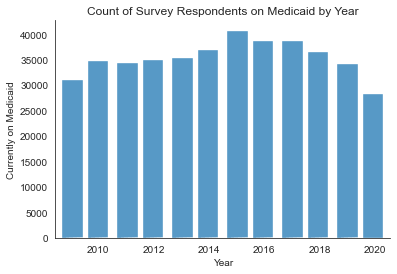

In [19]:
sns.set_style('white')
fig, ax = plt.subplots()
sns.histplot(data=MY, x='YEAR')
change_width(ax, .75)
plt.ylabel('Currently on Medicaid')
plt.xlabel('Year')
plt.title('Count of Survey Respondents on Medicaid by Year')
sns.despine()

I am struggling with plotting a chart that also includes on Medicaid by age. I think it might be because there are too many ages? See below for how a plot including age turns out

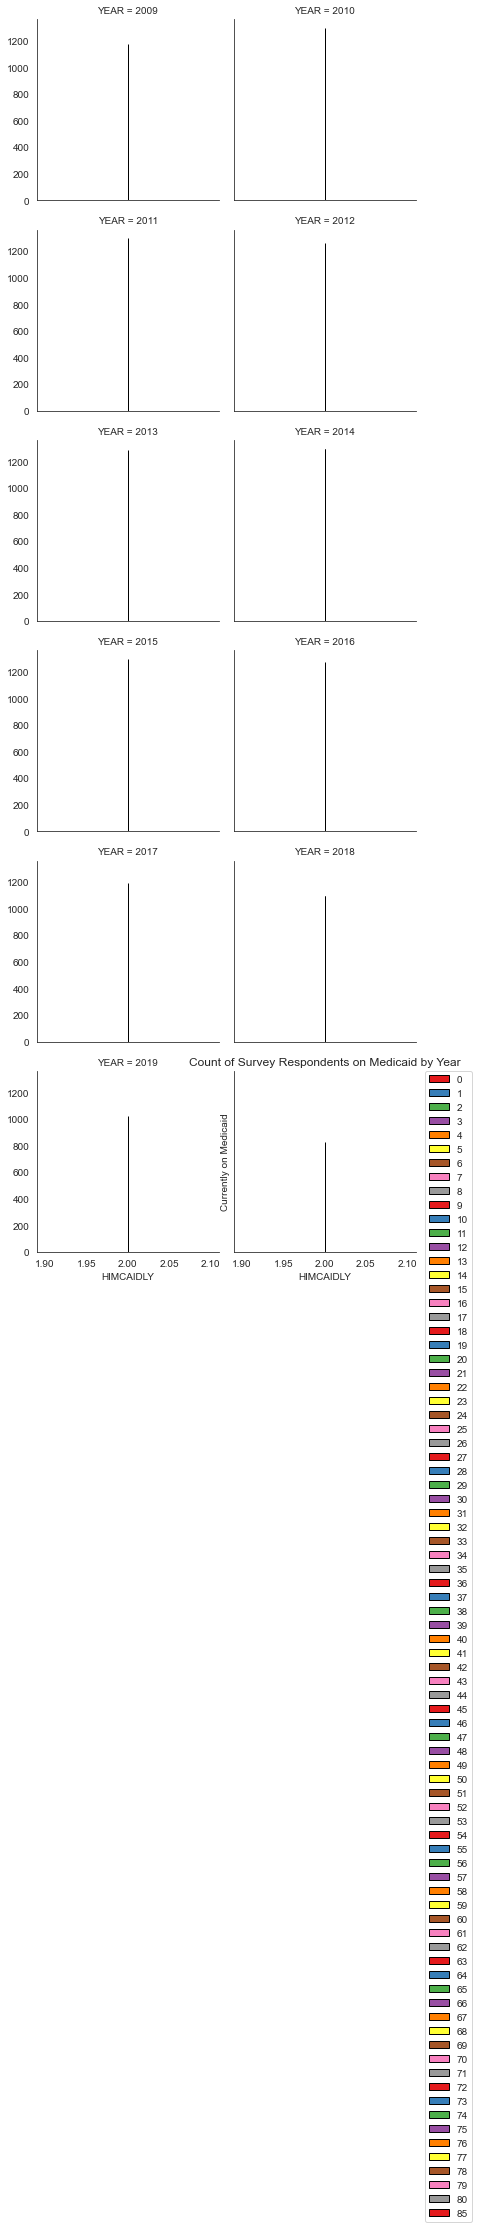

In [20]:
bins = np.linspace(MC_df.HIMCAIDLY.min(), MC_df.HIMCAIDLY.max(), 10)
g = sns.FacetGrid(MC_df, col="YEAR", hue="AGE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'HIMCAIDLY', bins=bins, ec="k")
g.axes[-1].legend()

# sns.set_style('darkgrid')
# fig, ax = plt.subplots()
# sns.histplot(data=MC_df, x='YEAR', hue='AGE')
# change_width(ax, .75)
plt.ylabel('Currently on Medicaid')
# plt.xlabel('Year')
plt.title('Count of Survey Respondents on Medicaid by Year')
# plt.show()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [69]:
plt.xkcd() # run this line if you want the coolest plots EVER -- DA

In [88]:
plt.rcdefaults() # run this line to return plots to noraml settings

In [93]:
Income = df['INCTOT']

In [94]:
Income

0           34000.0
1          110000.0
2           16081.0
3          146081.0
4           43550.0
             ...   
4372477         NaN
4372478         NaN
4372479         NaN
4372480         NaN
4372481         NaN
Name: INCTOT, Length: 4372482, dtype: float64

# Basic Data Analysis

In [30]:
reg = LinearRegression().fit(df[['HIMCAIDLY','YEAR']].fillna(0), df['INCTOT'].fillna(0))

TypeError: score() missing 2 required positional arguments: 'X' and 'y'